In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
train = pd.read_csv("/Users/happycatcat523/pyworks/kaggle資料/titanic/train.csv")
test = pd.read_csv("/Users/happycatcat523/pyworks/kaggle資料/titanic/test.csv")

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
train_shape = train.shape
test_shape = test.shape

print(train_shape)
print(test_shape)

(891, 12)
(418, 11)


In [55]:
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(['Survived'], axis = 1, inplace = True)
print("all_data side is : {}".format(all_data.shape))

all_data side is : (1309, 11)


/Users/happycatcat523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [56]:
#質問

#def all_kesson_table(df):
  #  null_val = df.isnull().sum()
  #  percent = 100 * df.isnull().sum()/len(df)
   # all_kesson_table =pd.concat([null_val, percent], axis = 1)
   # all_kesson_table_ren_columns = all_kesson_table.rename(columns = {0 : '欠損数', 1 : '%'})
  #  return all_kesson_table_ren_columns

#all_kesson_table(all_data)

In [2]:
#質問

#all_data["Embarked"] = all_data["Embarked"].fillna("S")

#print(all_kesson_table)

In [57]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
# TOP30だけを一旦見る
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' : all_data_na})

Text(0.5,1,'Percent missing data by feature')

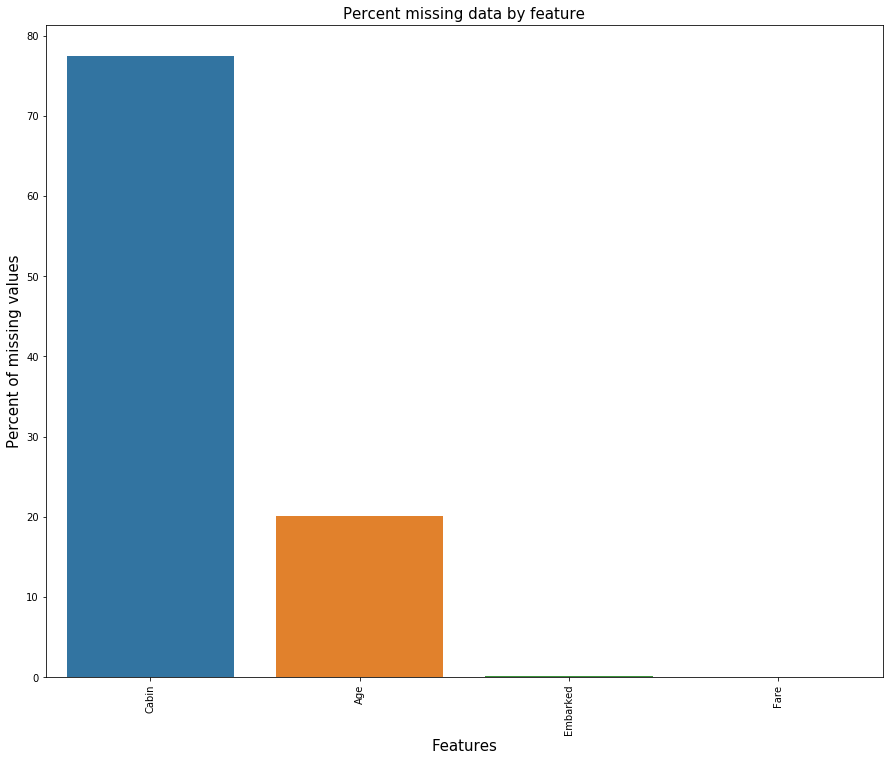

In [58]:
f, ax = plt.subplots(figsize = (15, 12))
plt.xticks(rotation = '90')
sns.barplot(x = all_data_na.index, y = all_data_na)
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Percent of missing values', fontsize = 15)
plt.title('Percent missing data by feature', fontsize = 15)

In [59]:
all_data['Cabin'] = all_data['Cabin'].fillna("Undefind")

In [60]:
all_data.head

<bound method NDFrame.head of        Age        Cabin Embarked      Fare  \
0     22.0     Undefind        S    7.2500   
1     38.0          C85        C   71.2833   
2     26.0     Undefind        S    7.9250   
3     35.0         C123        S   53.1000   
4     35.0     Undefind        S    8.0500   
5      NaN     Undefind        Q    8.4583   
6     54.0          E46        S   51.8625   
7      2.0     Undefind        S   21.0750   
8     27.0     Undefind        S   11.1333   
9     14.0     Undefind        C   30.0708   
10     4.0           G6        S   16.7000   
11    58.0         C103        S   26.5500   
12    20.0     Undefind        S    8.0500   
13    39.0     Undefind        S   31.2750   
14    14.0     Undefind        S    7.8542   
15    55.0     Undefind        S   16.0000   
16     2.0     Undefind        Q   29.1250   
17     NaN     Undefind        S   13.0000   
18    31.0     Undefind        S   18.0000   
19     NaN     Undefind        C    7.2250   
20  

In [61]:
all_data.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Ticket          object
dtype: object

In [62]:
def get_cabin_num(cabin):
    if cabin == "Undefined":
        return np.nan
    else:
        cabins = cabin.split(" ")
        count = len(cabins)
        return count
all_data['CabinCount'] = all_data['Cabin'].apply(get_cabin_num)

In [63]:
all_data.query("CabinCount > 1")

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,CabinCount
27,19.00,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,19950,3
75,25.00,F G73,S,7.6500,"Moen, Mr. Sigurd Hansen",0,76,3,male,0,348123,2
88,23.00,C23 C25 C27,S,263.0000,"Fortune, Miss. Mabel Helen",2,89,1,female,3,19950,3
97,23.00,D10 D12,C,63.3583,"Greenfield, Mr. William Bertram",1,98,1,male,0,PC 17759,2
118,24.00,B58 B60,C,247.5208,"Baxter, Mr. Quigg Edmond",1,119,1,male,0,PC 17558,2
128,NaN,F E69,C,22.3583,"Peter, Miss. Anna",1,129,3,female,1,2668,2
297,2.00,C22 C26,S,151.5500,"Allison, Miss. Helen Loraine",2,298,1,female,1,113781,2
299,50.00,B58 B60,C,247.5208,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,300,1,female,0,PC 17558,2
305,0.92,C22 C26,S,151.5500,"Allison, Master. Hudson Trevor",2,306,1,male,1,113781,2
311,18.00,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Emily Borie",2,312,1,female,2,PC 17608,4


In [64]:
def split_cabin(cabin, num):
    if cabin == "Undefined":
        return "Undefined"
    else:
        cabins = cabin.split(" ")
        if len(cabins) >= num:
            return cabins[num - 1]
        else:
            return "Undefined"
all_data['Cabin1'] = all_data['Cabin'].apply(split_cabin, num = 1)
all_data['Cabin2'] = all_data['Cabin'].apply(split_cabin, num = 2)
all_data['Cabin3'] = all_data['Cabin'].apply(split_cabin, num = 3)
all_data['Cabin4'] = all_data['Cabin'].apply(split_cabin, num = 4)

In [65]:
all_data.query("CabinCount > 1")

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,CabinCount,Cabin1,Cabin2,Cabin3,Cabin4
27,19.00,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,19950,3,C23,C25,C27,Undefined
75,25.00,F G73,S,7.6500,"Moen, Mr. Sigurd Hansen",0,76,3,male,0,348123,2,F,G73,Undefined,Undefined
88,23.00,C23 C25 C27,S,263.0000,"Fortune, Miss. Mabel Helen",2,89,1,female,3,19950,3,C23,C25,C27,Undefined
97,23.00,D10 D12,C,63.3583,"Greenfield, Mr. William Bertram",1,98,1,male,0,PC 17759,2,D10,D12,Undefined,Undefined
118,24.00,B58 B60,C,247.5208,"Baxter, Mr. Quigg Edmond",1,119,1,male,0,PC 17558,2,B58,B60,Undefined,Undefined
128,NaN,F E69,C,22.3583,"Peter, Miss. Anna",1,129,3,female,1,2668,2,F,E69,Undefined,Undefined
297,2.00,C22 C26,S,151.5500,"Allison, Miss. Helen Loraine",2,298,1,female,1,113781,2,C22,C26,Undefined,Undefined
299,50.00,B58 B60,C,247.5208,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,300,1,female,0,PC 17558,2,B58,B60,Undefined,Undefined
305,0.92,C22 C26,S,151.5500,"Allison, Master. Hudson Trevor",2,306,1,male,1,113781,2,C22,C26,Undefined,Undefined
311,18.00,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Emily Borie",2,312,1,female,2,PC 17608,4,B57,B59,B63,B66


In [66]:
# 文字列をラベル化した数値に変換する為のライブラリをインポート
from sklearn.preprocessing import LabelEncoder
# データタイプがobjectの列の値をラベル化した数値に変換
lbl = LabelEncoder()
lbl.fit(list(all_data['Cabin1'].values))
all_data['Cabin1'] = lbl.transform(list(all_data['Cabin1'].values))
lbl.fit(list(all_data['Cabin2'].values))
all_data['Cabin2'] = lbl.transform(list(all_data['Cabin2'].values))
lbl.fit(list(all_data['Cabin3'].values))
all_data['Cabin3'] = lbl.transform(list(all_data['Cabin3'].values))
lbl.fit(list(all_data['Cabin4'].values))
all_data['Cabin4'] = lbl.transform(list(all_data['Cabin4'].values))

In [67]:
all_data = all_data.drop('Cabin', axis=1)
all_data = all_data.drop('CabinCount', axis=1)

In [68]:
# AgeがNaNになってるやつの特徴を調べてみる
all_data.query('Age != Age').head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Cabin1,Cabin2,Cabin3,Cabin4
5,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,330877,181,17,4,1
17,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,244373,181,17,4,1
19,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,2649,181,17,4,1
26,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,2631,181,17,4,1
28,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,330959,181,17,4,1


In [70]:
def get_type_from_name(name):
    array_name = name.split(",")
    family_name = array_name[0]
    name_with_type = array_name[1].split(".")
    type = name_with_type[0].replace(" ","")
    return type
all_data['Type'] = all_data['Name'].apply(get_type_from_name)

In [71]:
all_data['Age'] = all_data.groupby("Type")["Age"].transform(lambda x : x.fillna(x.median()))

In [73]:
# EmbarkedがNaNになっているものを調べてみる
all_data.query('Embarked != Embarked')

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Cabin1,Cabin2,Cabin3,Cabin4,Type
61,38.0,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,113572,30,17,4,1,Miss
829,62.0,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,113572,30,17,4,1,Mrs


In [74]:
all_data["Embarked"] = all_data.groupby("Pclass")["Embarked"].transform(lambda x : x.fillna(x.mode()))

In [75]:
same_ticket_count_gp = all_data.groupby('Ticket', as_index = False).size().reset_index()
same_ticket_count_gp = same_ticket_count_gp.rename(columns={0: 'TicketCount'})
same_ticket_count_gp.head()

,Ticket,TicketCount
0,110152,3
1,110413,3
2,110465,2
3,110469,1
4,110489,1


In [79]:
all_data = pd.merge(all_data, same_ticket_count_gp, on = 'Ticket', how = 'left')
all_data['Fare'] = all_data['Fare'] / all_data['TicketCount']
all_data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Cabin1,Cabin2,Cabin3,Cabin4,Type,TicketCount_x,TicketCount_y,TicketCount
0,22.0,S,7.25000,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,181,17,4,1,Mr,1,1,1
1,38.0,C,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,106,17,4,1,Mrs,2,2,2
2,26.0,S,7.92500,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,181,17,4,1,Miss,1,1,1
3,35.0,S,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,70,17,4,1,Mrs,2,2,2
4,35.0,S,8.05000,"Allen, Mr. William Henry",0,5,3,male,0,373450,181,17,4,1,Mr,1,1,1


In [81]:
all_data = all_data.drop('TicketCount', axis = 1)

In [82]:
# FareがNaNになっているやつを調べみる
all_data.query('Fare != Fare')

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Cabin1,Cabin2,Cabin3,Cabin4,Type,TicketCount_x,TicketCount_y
1043,60.5,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,3701,181,17,4,1,Mr,1,1


In [83]:
all_data["Fare"] = all_data.groupby("Pclass")["Fare"].transform(lambda x : x.median())

In [84]:
all_data['Type'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'theCountess',
       'Jonkheer', 'Dona'], dtype=object)

                  Age     Fare  Parch  PassengerId  Pclass  SibSp  Cabin1  \
Type                                                                        
Capt            70.00    29.70      1          746       1      1      27   
Col            116.00    59.40      0         1343       2      0     191   
Don             40.00    29.70      0           31       1      0     181   
Dr             301.00   173.20      0         3821       9      4     991   
Jonkheer        38.00    29.70      0          823       1      0     181   
Lady            48.00    29.70      0          557       1      1       3   
Major           97.00    59.40      0          987       2      0      99   
Master         180.67   417.25     55        16599     105     92    6804   
Miss          3971.00  2576.60    100        74417     420    130   29294   
Mlle            48.00    59.40      0         1353       2      0     143   
Mme             24.00    29.70      0          370       1      0      33   

/Users/happycatcat523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<BarContainer object of 17 artists>

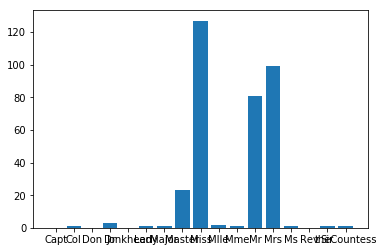

In [87]:
# Type別の生存者数を見てみる
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Survived.values
train_ch = all_data[:ntrain]
train_ch['Survived'] = y_train
grouped_ch =train_ch.groupby('Type').sum()
print(grouped_ch)
plt.bar(grouped_ch.index, grouped_ch.Survived.values)

In [89]:
# Master(赤ちゃん)
print("Pclass:1, Master count: " + str(train_ch.query('Type == "Master" and Pclass == 1').shape[0]))
print("Pclass:1, Master survived count: " + str(train_ch.query('Type == "Master" and Pclass == 1')['Survived'].sum()))
print("Pclass:2, Master count: " + str(train_ch.query('Type == "Master" and Pclass == 2').shape[0]))
print("Pclass:2, Master survived count: " + str(train_ch.query('Type == "Master" and Pclass == 2')['Survived'].sum()))
print("Pclass:3, Master count: " + str(train_ch.query('Type == "Master" and Pclass == 3').shape[0]))
print("Pclass:3, Master survived count: " + str(train_ch.query('Type == "Master" and Pclass == 3')['Survived'].sum()))

Pclass:1, Master count: 3
Pclass:1, Master survived count: 3
Pclass:2, Master count: 9
Pclass:2, Master survived count: 9
Pclass:3, Master count: 28
Pclass:3, Master survived count: 11


In [90]:
all_data['FamilyNum'] = all_data['SibSp'] + all_data['Parch'] + 1

In [92]:
all_data['Is_Alone'] = all_data['FamilyNum'] == 1

In [93]:
all_data.dtypes

Age              float64
Embarked          object
Fare             float64
Name              object
Parch              int64
PassengerId        int64
Pclass             int64
Sex               object
SibSp              int64
Ticket            object
Cabin1             int64
Cabin2             int64
Cabin3             int64
Cabin4             int64
Type              object
TicketCount_x      int64
TicketCount_y      int64
FamilyNum          int64
Is_Alone            bool
dtype: object

In [94]:
all_data['Pclass'] = ['c_' + str(x) for x in all_data.Pclass]

In [96]:
all_data['FareBin'] = pd.cut(all_data.Fare, 5, labels = False)
all_data['AgeBin'] = pd.cut(all_data.Age, 5, labels = False)
all_data = all_data.drop(['Fare', 'Age'], axis = 1)

In [98]:
all_data.head()

,Embarked,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Cabin1,Cabin2,Cabin3,Cabin4,Type,TicketCount_x,TicketCount_y,FamilyNum,Is_Alone,FareBin,AgeBin
0,S,"Braund, Mr. Owen Harris",0,1,c_3,male,1,A/5 21171,181,17,4,1,Mr,1,1,2,False,0,1
1,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,c_1,female,1,PC 17599,106,17,4,1,Mrs,2,2,2,False,4,2
2,S,"Heikkinen, Miss. Laina",0,3,c_3,female,0,STON/O2. 3101282,181,17,4,1,Miss,1,1,1,True,0,1
3,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,c_1,female,1,113803,70,17,4,1,Mrs,2,2,2,False,4,2
4,S,"Allen, Mr. William Henry",0,5,c_3,male,0,373450,181,17,4,1,Mr,1,1,1,True,0,2


In [99]:
all_data_PassengerId = all_data['PassengerId']
all_data_Name = all_data['Name'] 
all_data = all_data.drop('PassengerId', axis = 1)
all_data = all_data.drop('Name', axis = 1)
all_data = all_data.drop('Ticket', axis = 1)

In [100]:
#object型をDummy Encordeする
all_data = pd.get_dummies(all_data)

In [101]:
# 相関関係のチェック(Find correlations with the target and sort)
correlations = train_ch.corr()['Survived'].sort_values()
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(30))
print('\nMost Negative Correlattions:\n', correlations.head(30))

Most Positive Correlations:
 Pclass          -0.338481
Cabin1          -0.249074
Cabin2          -0.079671
Age             -0.071470
Cabin4          -0.060095
Cabin3          -0.040204
SibSp           -0.035322
PassengerId     -0.005007
TicketCount_x    0.064962
TicketCount_y    0.064962
Parch            0.081629
Fare             0.316493
Survived         1.000000
Name: Survived, dtype: float64

Most Negative Correlattions:
 Pclass          -0.338481
Cabin1          -0.249074
Cabin2          -0.079671
Age             -0.071470
Cabin4          -0.060095
Cabin3          -0.040204
SibSp           -0.035322
PassengerId     -0.005007
TicketCount_x    0.064962
TicketCount_y    0.064962
Parch            0.081629
Fare             0.316493
Survived         1.000000
Name: Survived, dtype: float64


In [106]:
all_data = all_data.drop('Type_Col', axis=1)
all_data = all_data.drop('Type_Major', axis = 1)
all_data = all_data.drop('Type_Don', axis=1)
all_data = all_data.drop('Type_Capt', axis=1)
all_data = all_data.drop('Type_Jonkheer', axis=1)
all_data = all_data.drop('Type_Dona', axis=1)

In [107]:
all_data.head()

,Parch,SibSp,Cabin1,Cabin2,Cabin3,Cabin4,TicketCount_x,TicketCount_y,FamilyNum,Is_Alone,...,Type_Master,Type_Miss,Type_Mlle,Type_Mme,Type_Mr,Type_Mrs,Type_Ms,Type_Rev,Type_Sir,Type_theCountess
0,0,1,181,17,4,1,1,1,2,False,...,0,0,0,0,1,0,0,0,0,0
1,0,1,106,17,4,1,2,2,2,False,...,0,0,0,0,0,1,0,0,0,0
2,0,0,181,17,4,1,1,1,1,True,...,0,1,0,0,0,0,0,0,0,0
3,0,1,70,17,4,1,2,2,2,False,...,0,0,0,0,0,1,0,0,0,0
4,0,0,181,17,4,1,1,1,1,True,...,0,0,0,0,1,0,0,0,0,0


In [108]:
all_data.dtypes

Parch               int64
SibSp               int64
Cabin1              int64
Cabin2              int64
Cabin3              int64
Cabin4              int64
TicketCount_x       int64
TicketCount_y       int64
FamilyNum           int64
Is_Alone             bool
FareBin             int64
AgeBin              int64
Embarked_C          uint8
Embarked_Q          uint8
Embarked_S          uint8
Pclass_c_1          uint8
Pclass_c_2          uint8
Pclass_c_3          uint8
Sex_female          uint8
Sex_male            uint8
Type_Lady           uint8
Type_Master         uint8
Type_Miss           uint8
Type_Mlle           uint8
Type_Mme            uint8
Type_Mr             uint8
Type_Mrs            uint8
Type_Ms             uint8
Type_Rev            uint8
Type_Sir            uint8
Type_theCountess    uint8
dtype: object

In [109]:
all_data.head()

,Parch,SibSp,Cabin1,Cabin2,Cabin3,Cabin4,TicketCount_x,TicketCount_y,FamilyNum,Is_Alone,...,Type_Master,Type_Miss,Type_Mlle,Type_Mme,Type_Mr,Type_Mrs,Type_Ms,Type_Rev,Type_Sir,Type_theCountess
0,0,1,181,17,4,1,1,1,2,False,...,0,0,0,0,1,0,0,0,0,0
1,0,1,106,17,4,1,2,2,2,False,...,0,0,0,0,0,1,0,0,0,0
2,0,0,181,17,4,1,1,1,1,True,...,0,1,0,0,0,0,0,0,0,0
3,0,1,70,17,4,1,2,2,2,False,...,0,0,0,0,0,1,0,0,0,0
4,0,0,181,17,4,1,1,1,1,True,...,0,0,0,0,1,0,0,0,0,0


In [110]:
X_train = all_data.iloc[:train.shape[0],:]
X_test = all_data.iloc[train.shape[0]:,:]
X_test_PassengerId = all_data_PassengerId.iloc[train.shape[0]:]

In [111]:
# モデル用のライブラリインポート
from sklearn.linear_model import LogisticRegression

slr = LogisticRegression()
# fit関数で学習開始
slr.fit(X_train,y_train)
# 偏回帰係数(回帰分析において得られる回帰方程式の各説明変数の係数)を出力
# 偏回帰係数はscikit-learnのcoefで取得
print('傾き:{0}'.format(slr.coef_[0]))

# y切片(直線とy軸との交点)を出力
print('y切片：{0}'.format(slr.intercept_))


傾き:[-2.23442447e-01 -4.52976288e-01 -2.07712879e-03  4.32961186e-02
 -1.40898221e-01  1.14048478e-01  6.37051579e-02  6.37051579e-02
 -2.39660933e-01 -5.00089768e-01  4.92188379e-01 -4.16819116e-01
  2.65483440e-01  1.73662335e-01 -1.21813672e-01 -2.52362087e-03
  5.02282863e-01 -6.30014392e-02  1.25176504e+00 -8.15007242e-01
  6.65725618e-02  2.13748569e+00  6.58870136e-02  8.04213453e-02
  3.58289063e-02 -7.72039748e-01  6.16686153e-01  1.67244035e-01
 -8.58749062e-01  3.54643565e-01  6.92898195e-02]
y切片：[0.4367578]


In [112]:
y_test_pred = slr.predict(X_test)

In [114]:
logistic_one = pd.DataFrame({
    "PassengerId": X_test_PassengerId,
    "Survived": y_test_pred
})
logistic_one.to_csv('logistic_one.csv', index = False)

In [115]:
X_train.head()

,Parch,SibSp,Cabin1,Cabin2,Cabin3,Cabin4,TicketCount_x,TicketCount_y,FamilyNum,Is_Alone,...,Type_Master,Type_Miss,Type_Mlle,Type_Mme,Type_Mr,Type_Mrs,Type_Ms,Type_Rev,Type_Sir,Type_theCountess
0,0,1,181,17,4,1,1,1,2,False,...,0,0,0,0,1,0,0,0,0,0
1,0,1,106,17,4,1,2,2,2,False,...,0,0,0,0,0,1,0,0,0,0
2,0,0,181,17,4,1,1,1,1,True,...,0,1,0,0,0,0,0,0,0,0
3,0,1,70,17,4,1,2,2,2,False,...,0,0,0,0,0,1,0,0,0,0
4,0,0,181,17,4,1,1,1,1,True,...,0,0,0,0,1,0,0,0,0,0
